### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMClassifier

In [2]:
# Load dataset 
df = joblib.load('database_metal_.pkl')
df = df.fillna(0)

# Define features and target variable
features = joblib.load('features_metal_.pkl')
print('No. of features', len(features))

df.head()

No. of features 468


,is_metal,MagpieData_minimum_Number,MagpieData_maximum_Number,MagpieData_range_Number,MagpieData_mean_Number,MagpieData_avg_dev_Number,MagpieData_mode_Number,MagpieData_minimum_MendeleevNumber,MagpieData_maximum_MendeleevNumber,MagpieData_range_MendeleevNumber,...,No,Lr,0norm,2norm,3norm,5norm,7norm,10norm,max_ionic_char,avg_ionic_char
0,0,16.0,79.0,63.0,47.400000,25.280000,16.0,65.0,88.0,23.0,...,1,1,3,0.600000,0.514256,0.460906,0.441882,0.428730,0.100238,0.015189
1,0,35.0,74.0,39.0,46.714286,15.619048,35.0,51.0,95.0,44.0,...,1,1,3,0.726873,0.683796,0.668584,0.666919,0.666681,0.232967,0.024404
2,1,16.0,82.0,66.0,36.275862,23.552913,16.0,65.0,88.0,23.0,...,1,1,4,0.621647,0.569761,0.553591,0.551970,0.551738,0.000000,0.000000
3,1,32.0,82.0,50.0,46.206897,17.388823,34.0,65.0,89.0,24.0,...,1,1,4,0.621647,0.569761,0.553591,0.551970,0.551738,0.000000,0.000000
4,0,5.0,47.0,42.0,33.500000,14.250000,47.0,65.0,95.0,30.0,...,1,1,3,0.612372,0.538609,0.506099,0.501109,0.500098,0.232967,0.041418


In [3]:
target = 'is_metal'
print(target)

is_metal


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\10. metal - covered property


In [5]:
# Split dataset
df_train, df_test = train_test_split(
                                    df, 
                                    test_size=0.2, 
                                    stratify=df[target].tolist(), 
                                    random_state=42
                                    ) 

In [6]:
# Save unscaled data
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '.pkl')
joblib.dump(df_test, target + '_results/' + 'df_test_' + str(target) + '.pkl')

['is_metal_results/df_test_is_metal.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

# Create pandas.Dataframe of scaled test set using scaler as defined using training set                           
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '_scaled.pkl')
joblib.dump(df_test, target + '_results/' +  'df_test_' + str(target) + '_scaled.pkl')

['is_metal_results/df_test_is_metal_scaled.pkl']

#### GBFS

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd

In [10]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\10. metal - covered property


In [11]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/10. metal - covered property/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_metal_.pkl'

problem = 'classification'

In [12]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = True, 
            problem = problem,
            target_classes=2
            )

Name of target column:  is_metal
No. of exploratory features:  468


In [13]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        objective='binary', 
        oversample_technique='smoothed_ros',
        cv_folds = 10
        )

Model employed:  lightGBM
Total no. of permutations: 8


   (1 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 20)]
   No. of rows in the training set: 3148

   Oversampling training data...
   No. of rows in training set after oversampling: 3160
   Metric score:  0.89947
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 3148

   Oversampling training data...
   No. of rows in training set after oversampling: 3160
   Metric score:  0.90879
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (3 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 20)]
   No. of rows in the training set: 3148

   Oversampling training data...
   No. of rows in training set after oversampling: 3160
   Metric score:  0.89232


   

LGBMClassifier(importance_type='gain', learning_rate=0.2, n_estimators=200,
               num_leaves=20, objective='binary')

Result saved as: feature_relevance_score_is_metal.pkl
Figure saved as: feature_relevance_plot_is_metal.png


,feature,relevance_score
0,MagpieData_mean_NpValence,2581.806984
1,MagpieData_maximum_MendeleevNumber,1035.268005
2,MEGNetElementData_std_dev_embedding_10,769.165701
3,MagpieData_mean_NpUnfilled,280.879272
4,0norm,255.113004
...,...,...
463,MagpieData_range_NsValence,0.000000
464,MagpieData_maximum_NsValence,0.000000
465,MagpieData_minimum_NsValence,0.000000
466,MagpieData_minimum_CovalentRadius,0.000000


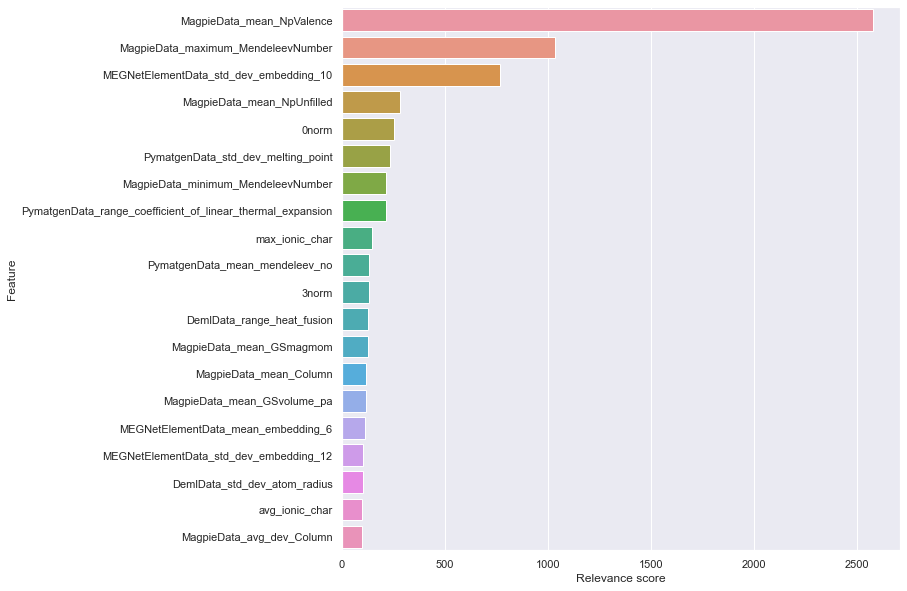

In [14]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [15]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = True, 
                    oversample_technique = 'smoothed_ros', 
                    chosen_metric = 'f1_score',
                    average = 'weighted',
                    no_to_terminate = 100,
                    max_no_imp = 10
                    )

   No. of rows in training set:  3148
No. of features considering:  1

n=1: train_acc=0.8193, validation_acc=0.6662 

n=1: train_b_acc=0.8190, validation_b_acc=0.6668 

n=1: train_hl=0.1807 validation_hl=0.3338 

n=1: train_f1=0.8186, validation_f1=0.6619 

n=1: train_roc_auc=0.8895, validation_roc_auc=0.7119 

n=1: train_avg_precision)=0.8648, validation_avg_precision)=0.6862 

--- 0.22820663452148438 seconds --- 

No. of features considering:  2

n=2: train_acc=0.8898, validation_acc=0.6371 

n=2: train_b_acc=0.8898, validation_b_acc=0.6373 

n=2: train_hl=0.1102 validation_hl=0.3629 

n=2: train_f1=0.8898, validation_f1=0.6363 

n=2: train_roc_auc=0.9611, validation_roc_auc=0.6875 

n=2: train_avg_precision)=0.9599, validation_avg_precision)=0.6197 

--- 0.1681528091430664 seconds --- 

No. of features considering:  3

n=3: train_acc=0.9638, validation_acc=0.7259 

n=3: train_b_acc=0.9638, validation_b_acc=0.7263 

n=3: train_hl=0.0362 validation_hl=0.2741 

n=3: train_f1=0.9638, va

,train_acc,validation_acc,train_b_acc,validation_b_acc,train_hamming,validation_hamming,train_avg_precision,validation_avg_precision,train_roc_auc,validation_roc_auc,train_f1,validation_f1
no_of_features,,,,,,,,,,,,
1,0.819250,0.666244,0.819033,0.666821,0.180750,0.333756,0.864850,0.686227,0.889505,0.711873,0.818638,0.661936
2,0.889771,0.637056,0.889802,0.637291,0.110229,0.362944,0.959860,0.619734,0.961112,0.687542,0.889767,0.636299
3,0.963787,0.725888,0.963784,0.726281,0.036213,0.274112,0.995847,0.814544,0.995731,0.826853,0.963786,0.724292
4,0.978081,0.786802,0.978085,0.787144,0.021919,0.213198,0.998222,0.879795,0.998124,0.883230,0.978081,0.785871
5,0.989517,0.799492,0.989533,0.799796,0.010483,0.200508,0.999478,0.897420,0.999446,0.903039,0.989517,0.798808
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,0.916244,1.000000,0.916241,0.000000,0.083756,1.000000,0.967429,1.000000,0.966978,1.000000,0.916244
96,1.000000,0.907360,1.000000,0.907326,0.000000,0.092640,1.000000,0.966512,1.000000,0.964891,1.000000,0.907354
97,1.000000,0.908629,1.000000,0.908666,0.000000,0.091371,1.000000,0.969342,1.000000,0.966682,1.000000,0.908628


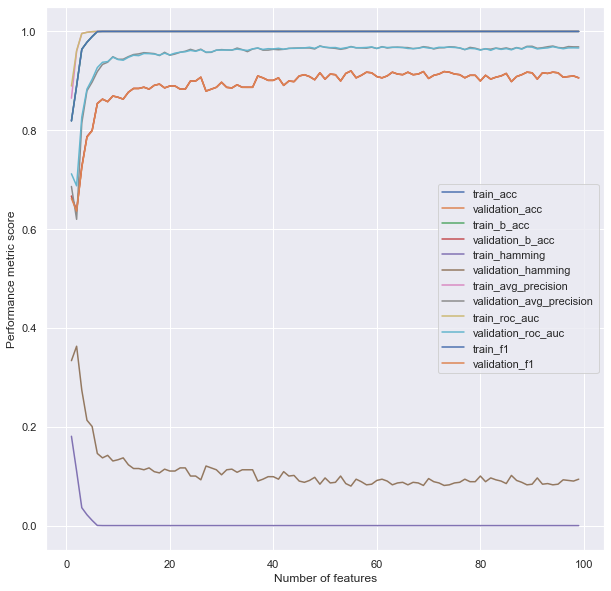

Result saved as: GBFS_convergence_plot_is_metal.png


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot()

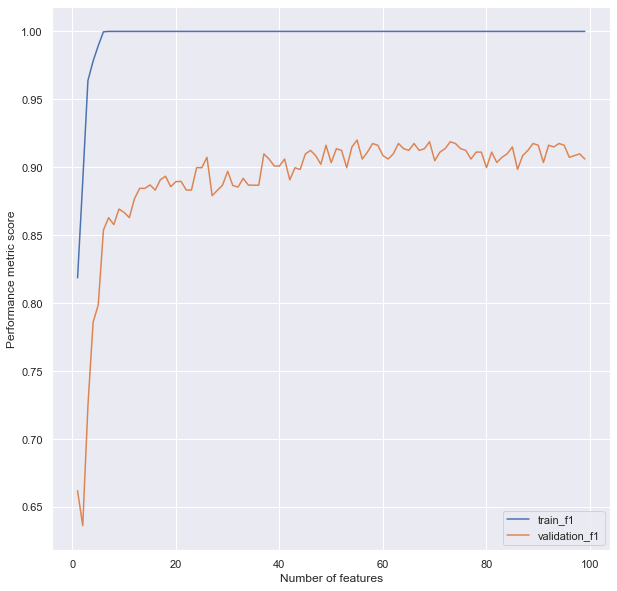

Result saved as: GBFS_convergence_plot_is_metal.png


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_f1',
                    validation_metric = 'validation_f1'
                    )

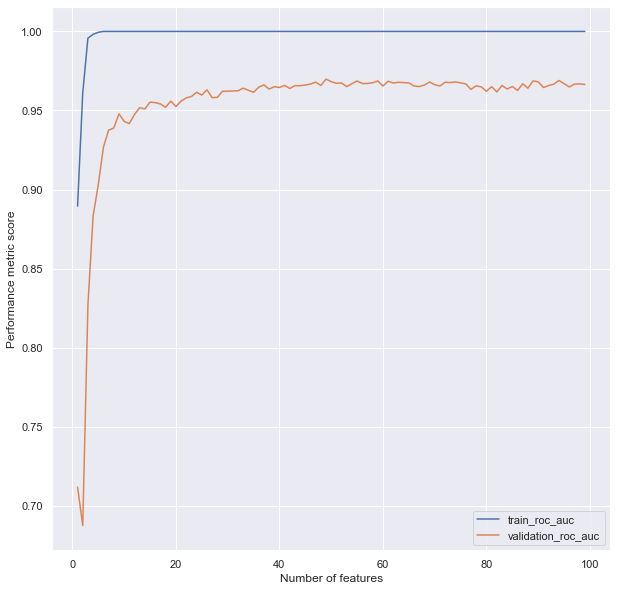

Result saved as: GBFS_convergence_plot_is_metal.png


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_roc_auc',
                    validation_metric = 'validation_roc_auc'
                    )

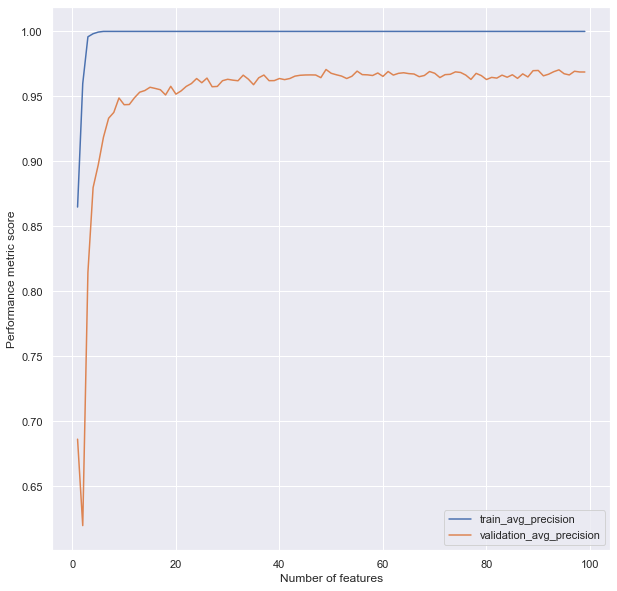

Result saved as: GBFS_convergence_plot_is_metal.png


<Figure size 720x720 with 0 Axes>

In [19]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_avg_precision',
                    validation_metric = 'validation_avg_precision'
                    )

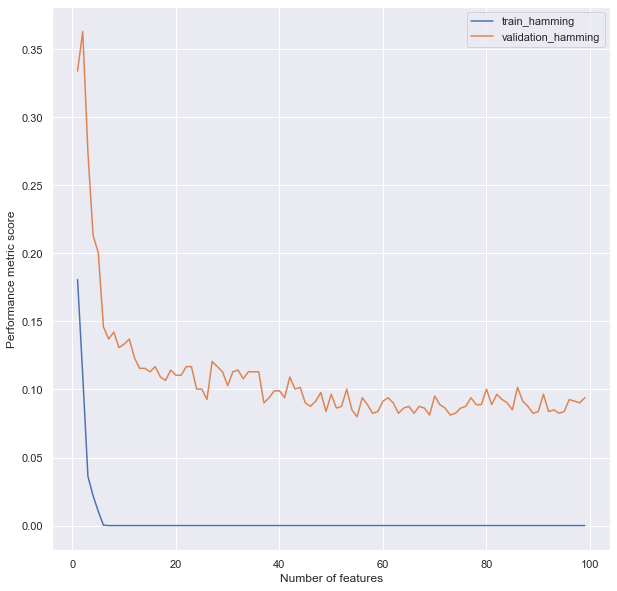

Result saved as: GBFS_convergence_plot_is_metal.png


<Figure size 720x720 with 0 Axes>

In [20]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_hamming',
                    validation_metric = 'validation_hamming'
                    )

In [21]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Classification

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd

In [2]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/10. metal - covered property/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_metal_.pkl'

problem = 'classification'

In [3]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  is_metal
No. of exploratory features:  468


In [4]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  22
No. of exploratory features:  446


,MagpieData_minimum_Number,MagpieData_maximum_Number,MagpieData_range_Number,MagpieData_mean_Number,MagpieData_avg_dev_Number,MagpieData_mode_Number,MagpieData_minimum_MendeleevNumber,MagpieData_maximum_MendeleevNumber,MagpieData_range_MendeleevNumber,MagpieData_mean_MendeleevNumber,...,U,0norm,2norm,3norm,5norm,7norm,10norm,max_ionic_char,avg_ionic_char,is_metal
3710,0.060241,0.103448,0.098901,0.042114,0.080357,0.054348,0.765957,0.76,0.063158,0.773417,...,1.0,0.0,0.582303,0.601673,0.628792,0.641408,0.650197,0.004888,0.000917,1
3694,0.168675,0.310345,0.197802,0.136330,0.048343,0.152174,0.829787,0.77,0.000000,0.822230,...,1.0,0.0,0.885596,0.902153,0.911825,0.915016,0.917115,0.000000,0.000000,1
1998,0.349398,0.505747,0.219780,0.377740,0.094266,0.369565,0.680851,0.87,0.263158,0.864407,...,1.0,1.0,0.245891,0.304527,0.361497,0.384143,0.399331,0.137763,0.025571,1
160,0.397590,0.344828,0.021978,0.363988,0.015873,0.358696,0.893617,0.93,0.115789,0.942908,...,1.0,0.5,0.155010,0.139333,0.127580,0.122757,0.119224,0.141098,0.023989,0
2655,0.036145,0.229885,0.241758,0.077210,0.097222,0.086957,0.000000,0.85,0.905263,0.802855,...,1.0,1.0,0.395223,0.455250,0.503537,0.521312,0.533125,0.779730,0.118209,0


In [5]:
df_anova = analyses.ANOVA_F_test(
                                problem=problem, 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  0
No. of numerical features:  446 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_is_metal_classification.pkl


,feature_names,f_statistic,f_statistic_scaled
0,MagpieData_mean_NpValence,1775.214084,1.000000
1,MagpieData_mean_Column,1607.271377,0.905396
2,MagpieData_maximum_NpValence,1443.694378,0.813251
3,MagpieData_maximum_MendeleevNumber,1257.267914,0.708235
4,MagpieData_mean_MendeleevNumber,1197.459929,0.674544
...,...,...,...
441,PymatgenData_std_dev_X,0.003420,0.000002
442,B,0.003034,0.000002
443,MagpieData_minimum_Row,0.002789,0.000002
444,La,0.001930,0.000001


In [6]:
# No categorical features
# df_chi2 = analyses.chi2_test(csv=False)

# df_chi2

In [7]:
df_mi = analyses.mutual_information(
                                problem=problem, 
                                csv=False
                                )

df_mi 

There are:
No. of categorical features:  0
No. of numerical features:  446 

Result saved as: MI_result_is_metal.pkl


,feature_names,MI,MI_scaled
0,PymatgenData_range_thermal_conductivity,0.306202,1.000000
1,MagpieData_mean_Column,0.295137,0.963865
2,MEGNetElementData_range_embedding_6,0.279791,0.913749
3,MagpieData_maximum_MendeleevNumber,0.275957,0.901226
4,MEGNetElementData_range_embedding_8,0.272924,0.891320
...,...,...,...
425,DemlData_range_row_num,0.000000,0.000000
424,Cd,0.000000,0.000000
423,Ca,0.000000,0.000000
422,Br,0.000000,0.000000


In [8]:
df_ld = analyses.logistic_discrimination(
                                        target_classes=2, 
                                        class_names=['Metal', 'Non-Metal'], 
                                        csv=False
                                        )

df_ld

Result saved as: logistic_discrimination_result_is_metal.pkl


,feature_names,coefficient
0,MagpieData_minimum_Number,0.262912
1,MagpieData_maximum_Number,0.134858
2,MagpieData_range_Number,-0.102739
3,MagpieData_mean_Number,-0.503562
4,MagpieData_avg_dev_Number,0.586766
...,...,...
441,At,-0.166457
442,Rn,-0.390326
443,Fr,-0.512150
444,Ra,-1.913349


#### Feature Engineering 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/10. metal - covered property/'
path_to_save = path + target + '_results/'
path_to_file = path + 'database_metal_.pkl'  # all data

# Either a list or saved file
features = path + 'features_metal_.pkl'

problem = 'classification'

In [3]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_' + problem + '.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,MagpieData_mean_NpValence,1775.214084,1.000000
1,MagpieData_mean_Column,1607.271377,0.905396
2,MagpieData_maximum_NpValence,1443.694378,0.813251
3,MagpieData_maximum_MendeleevNumber,1257.267914,0.708235
4,MagpieData_mean_MendeleevNumber,1197.459929,0.674544


In [4]:
# # Top n features from chi2 
# df_chi2 = joblib.load(path_to_save + 'chi_squared_test_result_' + target + '.pkl')

# # Top n features
# n = 5
# chi2_features = df_chi2['feature_names'].tolist()[:n]

# df_chi2.iloc[:n, :]

In [5]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,PymatgenData_range_thermal_conductivity,0.306202,1.000000
1,MagpieData_mean_Column,0.295137,0.963865
2,MEGNetElementData_range_embedding_6,0.279791,0.913749
3,MagpieData_maximum_MendeleevNumber,0.275957,0.901226
4,MEGNetElementData_range_embedding_8,0.272924,0.891320


In [6]:
# Top n features from LR 
df_ld = joblib.load(path_to_save + 'logistic_discrimination_result_' + target + '.pkl')

# Top and bottom n features
n = 2
df_ld = df_ld.sort_values('coefficient')
ld_features = df_ld['feature_names'].tolist()[:n] + df_ld['feature_names'].tolist()[-n:]

df_ld.iloc[:n, :], df_ld.iloc[-n:, :]

(                         feature_names  coefficient
 47   MagpieData_mode_Electronegativity    -2.119732
 444                                 Ra    -1.913349,
     feature_names  coefficient
 427            Lu     1.817346
 368            Mg     1.886246)

In [7]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,MagpieData_mean_NpValence,2581.806984
1,MagpieData_maximum_MendeleevNumber,1035.268005
2,MEGNetElementData_std_dev_embedding_10,769.165701
3,MagpieData_mean_NpUnfilled,280.879272
4,0norm,255.113004


In [8]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  is_metal
No. of exploratory features:  468


In [9]:
# Join the features
# feature_list = anova_features + chi2_features + mi_features + ld_features + gbfs_features
feature_list = anova_features + mi_features + ld_features + gbfs_features

print(len(feature_list))

19


In [10]:
# Perform feature engineering
df, new_cols = perform.brute_force(
                    feature_list = feature_list
                    )

df.head()

Total number of permutation: 342
Invalid operations: 129


,MagpieData_minimum_Number,MagpieData_maximum_Number,MagpieData_range_Number,MagpieData_mean_Number,MagpieData_avg_dev_Number,MagpieData_mode_Number,MagpieData_minimum_MendeleevNumber,MagpieData_maximum_MendeleevNumber,MagpieData_range_MendeleevNumber,MagpieData_mean_MendeleevNumber,...,0norm/PymatgenData_range_thermal_conductivity,0norm/MEGNetElementData_range_embedding_6,0norm/MEGNetElementData_range_embedding_8,0norm/MagpieData_mode_Electronegativity,0norm/Ra,0norm/Lu,0norm/Mg,0norm/MEGNetElementData_std_dev_embedding_10,0norm/MagpieData_mean_NpUnfilled,is_metal
0,16.0,79.0,63.0,47.400000,25.280000,16.0,65.0,88.0,23.0,74.600000,...,0.006980,21.489410,35.513881,1.181102,3.0,3.0,3.0,16.572621,3.750000,0
1,35.0,74.0,39.0,46.714286,15.619048,35.0,51.0,95.0,44.0,81.000000,...,0.006979,6.586125,3.075645,1.013514,3.0,3.0,3.0,5.995047,4.500000,0
2,16.0,82.0,66.0,36.275862,23.552913,16.0,65.0,88.0,23.0,83.482759,...,0.009307,12.497523,9.244723,1.550388,4.0,4.0,4.0,22.405948,1.526316,1
3,32.0,82.0,50.0,46.206897,17.388823,34.0,65.0,89.0,24.0,84.034483,...,0.009314,10.125619,11.350990,1.568627,4.0,4.0,4.0,32.392550,1.526316,1
4,5.0,47.0,42.0,33.500000,14.250000,47.0,65.0,95.0,30.0,74.250000,...,0.006979,6.458593,3.878416,1.554404,3.0,3.0,3.0,9.130894,2.000000,0


In [11]:
perform.save()

Result saved as: df_is_metal_engineered_features.pkl
Result saved as: features_is_metal_engineered.pkl
Result saved as: df_train_is_metal_engineered.pkl
Result saved as: df_test_is_metal_engineered.pkl


#### Multi-Collinearity Reduction

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/10. metal - covered property/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 50 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'classification'

print('No. of columns from GBFS:', len(gbfs_cols))
print('No. of new columns:',len(new_cols))

len(features)

No. of columns from GBFS: 50
No. of new columns: 213


263

In [3]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  is_metal
No. of exploratory features:  263


In [4]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.9)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  139
Features saved as: features_selected_from_correlation_analysis_is_metal.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_is_metal.png


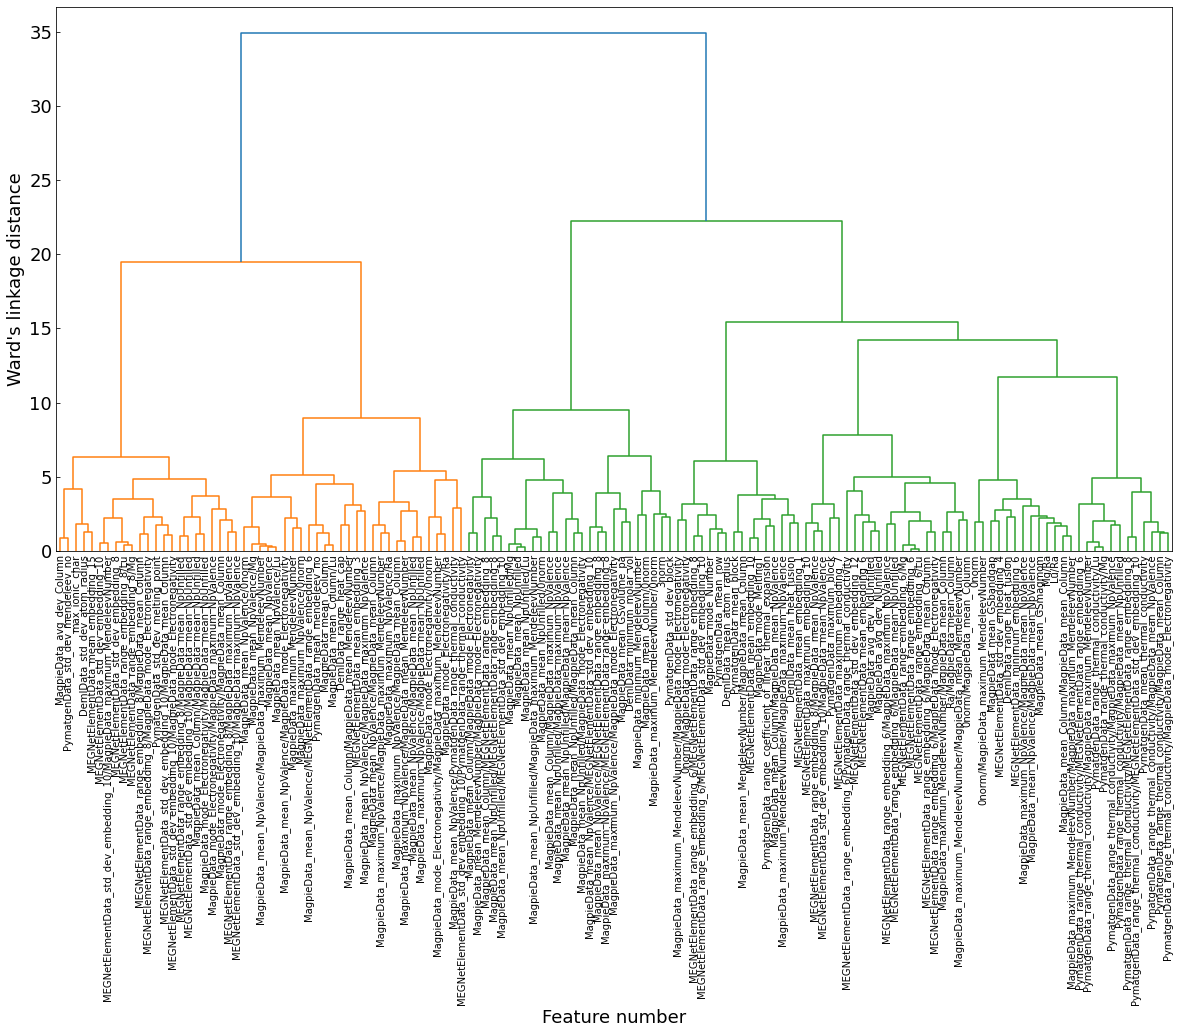

In [5]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [6]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  119
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_1.pkl
Number of features remaining:  75
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_2.pkl
Number of features remaining:  43
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_3.pkl
Number of features remaining:  27
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_4.pkl
Number of features remaining:  16
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_5.pkl


#### Test Dummy Model

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [2]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/10. metal - covered property/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'classification'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_3.pkl')
len(features)

43

In [3]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        random_state=42,
                        learning_rate=0.1,
                        n_estimators=400,
                        num_leaves=40,
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', n_estimators=400, num_leaves=40,
               objective='binary', random_state=42)

In [4]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['Indirect', 'Direct'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))

1. The F-1 score of the model 0.9350487060053961

2. The recall score of the model 0.9350253807106599

3. Classification report 
               precision    recall  f1-score   support

    Indirect      0.921     0.945     0.933       472
      Direct      0.948     0.926     0.937       513

    accuracy                          0.935       985
   macro avg      0.935     0.935     0.935       985
weighted avg      0.935     0.935     0.935       985
 

4. Classification report 
 [[[475  38]
  [ 26 446]]

 [[446  26]
  [ 38 475]]] 

5. Confusion matrix 
 [[446  26]
 [ 38 475]] 

6. Accuracy score 
 0.9350253807106599 

7. Balanced accuracy score 
 0.935420590081607 



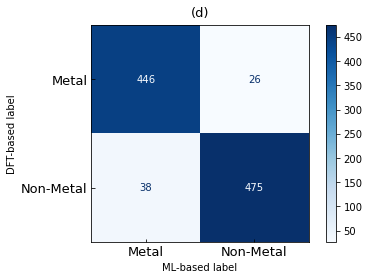

In [5]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['Metal', 'Non-Metal'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )

disp.ax_.set_title('(d)', fontsize=fontsize, y=1.01) 

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
# plt.savefig('confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

#### Recursive Feature Elimination

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [2]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/10. metal - covered property/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
print(len(features))

scaled = False

problem = 'classification'

75


In [3]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: is_metal
No. of features: 75


In [4]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM', objective='binary')
RFE_features = run.perform(cv_fold=10)

Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 fe

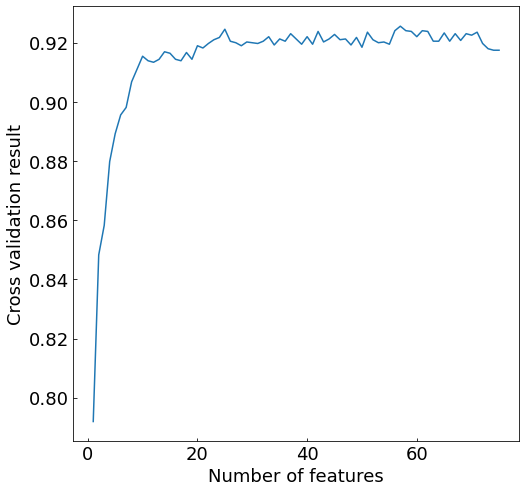

Figure saved as: RFE_plot_is_metal.png


In [5]:
# Plot figure
run.RFE_plot()

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'is_metal'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/10. metal - covered property/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  is_metal
No. of exploratory features:  57


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM', objective='binary')

LGBMClassifier(importance_type='gain', objective='binary', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.053373681630558396, 'n_estimators': 204, 'num_leaves': 18} 

Score:  -0.920457477367804 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.1379
Function value obtained: -0.9205
Current minimum: -0.9205
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.07571742961109588, 'n_estimators': 222, 'num_leaves': 68} 

Score:  -0.9242635898120029 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.8666
Function value obtained: -0.9243
Current minimum: -0.9243
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.4556611545872555, 'n_estimators': 718, 'num_leaves': 83} 

Score:  -0.9237681468271465 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.1880
Function value obtained: -0.9238
Current minimum: -0.9243
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate'

Saved: Optimisation_result_is_metal.png


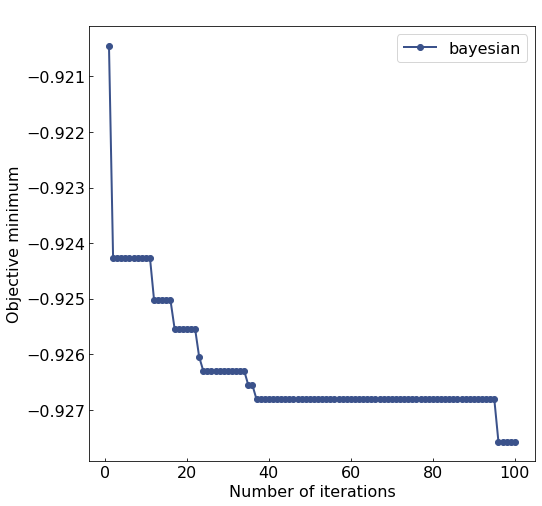

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

<Figure size 720x720 with 0 Axes>

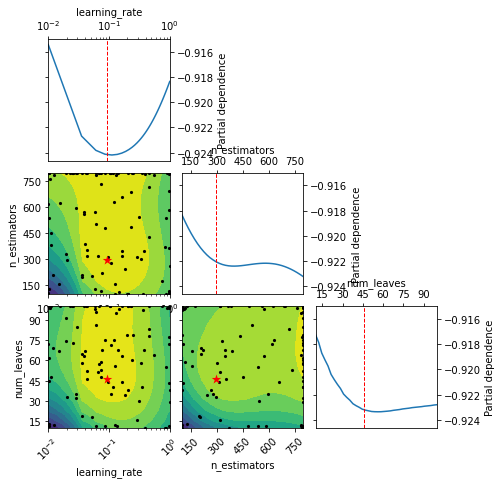

<Figure size 720x720 with 0 Axes>

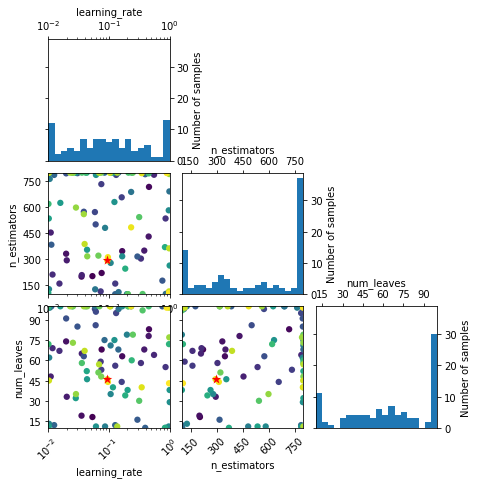

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

<Figure size 720x720 with 0 Axes>

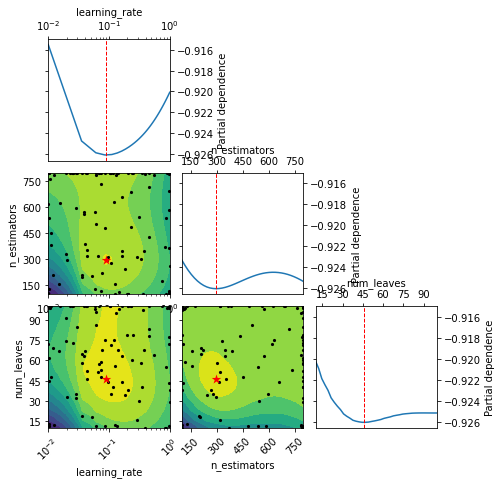

In [9]:
# objective and evaluation plot # expected_minimum_random, expected_minimum
final_stage.objective_plot_adjust(sample_source='expected_minimum', minimum='expected_minimum', n_minimum_search=2)

In [10]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMClassifier(importance_type='gain', learning_rate=0.09421412816899173,
               n_estimators=294, num_leaves=46, objective='binary',
               random_state=42)

1. The F-1 score of the model 0.9289567392094378

2. The recall score of the model 0.9289340101522843

3. Classification report 
               precision    recall  f1-score   support

       Metal       0.92      0.94      0.93       472
   Non-Metal       0.94      0.92      0.93       513

    accuracy                           0.93       985
   macro avg       0.93      0.93      0.93       985
weighted avg       0.93      0.93      0.93       985
 

4. Classification report 
 [[[473  40]
  [ 30 442]]

 [[442  30]
  [ 40 473]]] 

5. Confusion matrix 
 [[442  30]
 [ 40 473]] 

6. Accuracy score 
 0.9289340101522843 

7. Balanced accuracy score 
 0.9292339842072224 



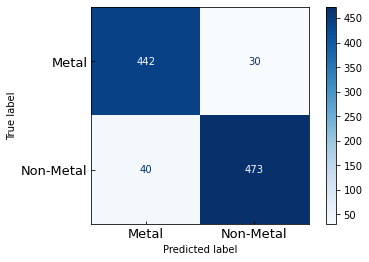

Saved: Confusion_matrix_is_metal.png


In [11]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy='weighted', 
                    target_names=['Metal', 'Non-Metal']
                    )


roc_auc_score: 0.9803581458353983


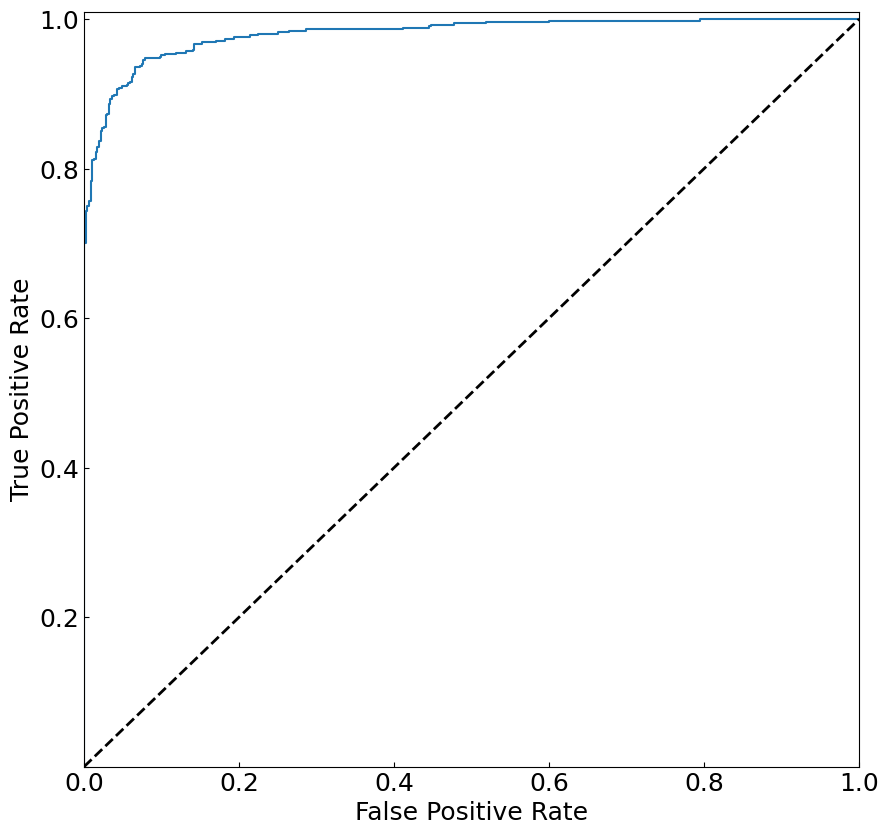

Saved: Receiver_operating_characteristic_curve_is_metal.png


In [12]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=True,
                positive_class=1
                )

Possible DET equal error rate (see the plot and find the correct value): [1.0, 0.04873]


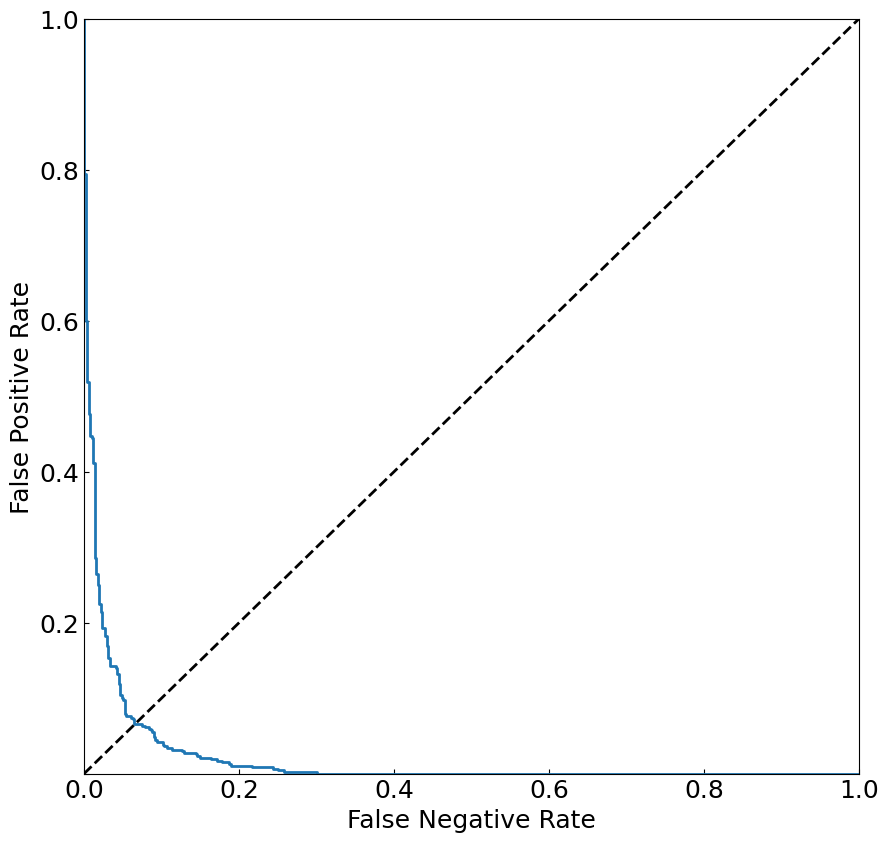

Saved: detection_error_tradeoff_curves_is_metal.png


In [13]:
# Evaluate model using test set
final_stage.DET()

average_precision: 0.9843905737776873


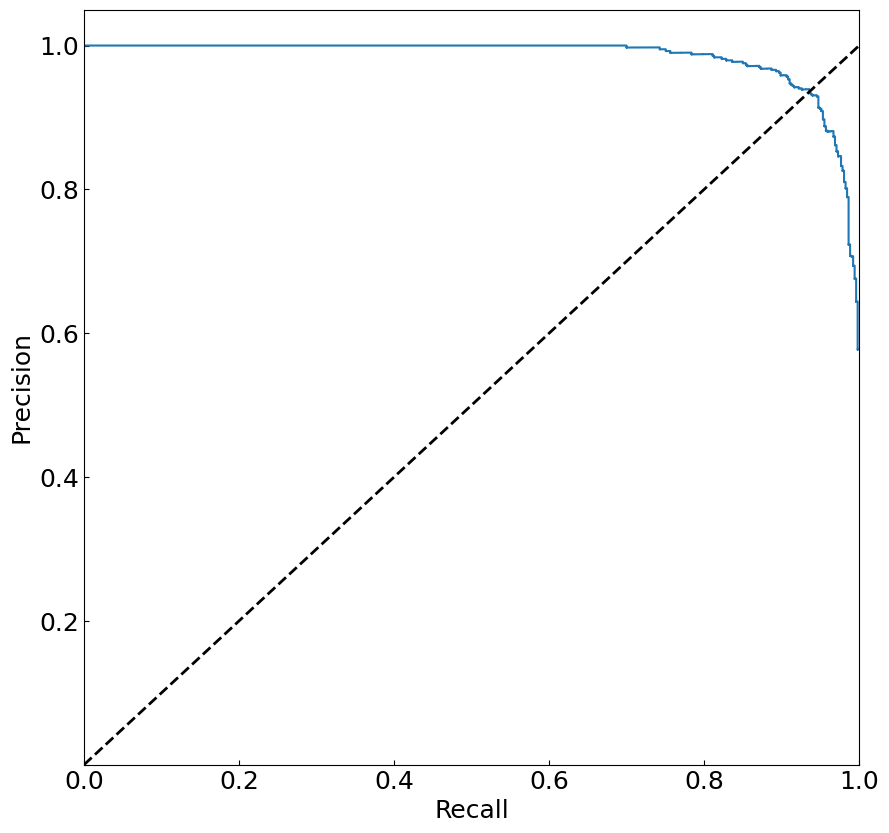

Saved: precision_recall_is_metal.png


In [14]:
# Evaluate model using test set
final_stage.PR(positive_class=1)

### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [2]:
# Target
target = 'is_metal'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/10. metal - covered property/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
df_train = joblib.load(path_to_train_data)
df_test = joblib.load(path_to_test_data)

features = joblib.load(path_to_features)

In [4]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        learning_rate=0.09421412816899173,
                        n_estimators=294,
                        num_leaves=46,
                        random_state=42
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', learning_rate=0.09421412816899173,
               n_estimators=294, num_leaves=46, objective='binary',
               random_state=42)

In [5]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['Indirect', 'Direct'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))


1. The F-1 score of the model 0.9340263591629862

2. The recall score of the model 0.934010152284264

3. Classification report 
               precision    recall  f1-score   support

    Indirect      0.925     0.939     0.932       472
      Direct      0.943     0.930     0.936       513

    accuracy                          0.934       985
   macro avg      0.934     0.934     0.934       985
weighted avg      0.934     0.934     0.934       985
 

4. Classification report 
 [[[477  36]
  [ 29 443]]

 [[443  29]
  [ 36 477]]] 

5. Confusion matrix 
 [[443  29]
 [ 36 477]] 

6. Accuracy score 
 0.934010152284264 

7. Balanced accuracy score 
 0.9341919417187036 



In [6]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, average_precision_score

print(roc_auc_score(np.array(y_test.tolist()), y_pred[:, 1], average='macro'))


print(matthews_corrcoef(np.array(y_test.tolist()), y_pred_2))

y_test_2 = label_binarize(y_test, classes = list(range(2)))
print(average_precision_score(y_test_2, y_pred[:, 1], average="macro"))

0.9805274721644034
0.8679574224193448
0.9845323068638157


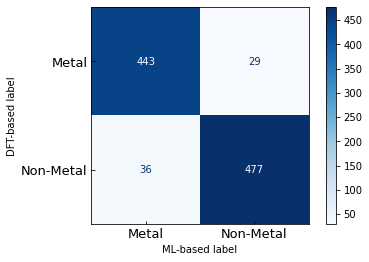

In [7]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['Metal', 'Non-Metal'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )


plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
plt.savefig(path_to_save + 'confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

In [8]:
df_test.groupby([target]).count()

,MagpieData_minimum_Number,MagpieData_maximum_Number,MagpieData_range_Number,MagpieData_mean_Number,MagpieData_avg_dev_Number,MagpieData_mode_Number,MagpieData_minimum_MendeleevNumber,MagpieData_maximum_MendeleevNumber,MagpieData_range_MendeleevNumber,MagpieData_mean_MendeleevNumber,...,0norm/MagpieData_mean_MendeleevNumber,0norm/PymatgenData_range_thermal_conductivity,0norm/MEGNetElementData_range_embedding_6,0norm/MEGNetElementData_range_embedding_8,0norm/MagpieData_mode_Electronegativity,0norm/Ra,0norm/Lu,0norm/Mg,0norm/MEGNetElementData_std_dev_embedding_10,0norm/MagpieData_mean_NpUnfilled
is_metal,,,,,,,,,,,,,,,,,,,,,
0,472,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,472,472,472,472
1,513,513,513,513,513,513,513,513,513,513,...,513,513,513,513,513,513,513,513,513,513


[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

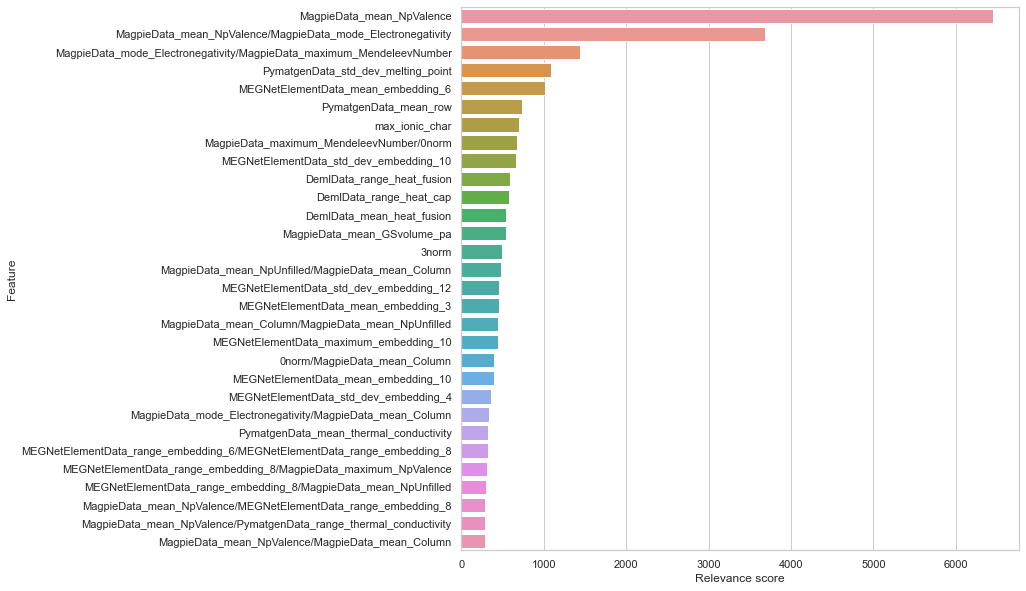

In [9]:
import seaborn as sns
# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)